In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
import seaborn as sns
sns.set(color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("/Users/umangchaudhry/Documents/Vanderbilt/Grad School/Fall 2020/Case Studies in Data Science/Case Study 2/DSCaseStudy2-Credit-Fraud/data/test_data_full.csv")


In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled,prediction,predicted_probability,proba_decile,FN,FP
0,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,-1.118863,0.202647,1.145965,-1.802360,-0.247178,-0.060945,0.846606,0.379454,0.847262,0.186409,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,0.001557,0,0.060079,9,0,0
1,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,-0.854776,-0.620458,-0.806471,-0.770837,-0.108158,0.258964,0.492095,-0.148516,-0.148099,-0.096502,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,0.000077,0,0.021009,4,0,0
2,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,-1.726259,-0.736771,-1.516835,0.348343,0.041437,0.732681,-1.136766,0.816653,-1.578951,0.419835,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.003737,0,0.047810,8,0,0
3,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,1.551682,0.435125,-0.336022,0.278965,1.812232,0.080001,0.116347,0.291818,0.106228,-0.987790,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.011989,0,0.041375,7,0,0
4,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,0.664531,-3.282511,0.409266,1.252202,-0.868774,0.214387,1.878003,-1.906559,0.263854,-0.126871,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,0.000195,0,0.267111,17,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,148949.0,-1.227033,0.987207,0.654979,-2.559724,0.346834,-0.634095,0.738285,0.405477,0.070475,-1.639968,-1.450730,-0.086285,-0.271235,0.247726,-0.462397,0.490922,-0.645877,-0.319184,-0.739693,-0.097164,-0.070342,-0.293542,-0.371721,0.518298,0.858450,0.749546,0.011475,0.027130,0,0.000790,0,0.001619,0,0,0
56958,78200.0,1.250596,0.159552,0.147621,0.472220,-0.023937,-0.287444,0.021041,-0.041342,0.102588,-0.090898,-0.541838,0.052143,-0.068271,0.349700,1.259516,0.074578,-0.254954,-0.773042,-0.276357,-0.130836,-0.210083,-0.580817,0.049119,-0.429060,0.299309,0.234803,-0.022217,0.006667,0,0.000239,0,0.092787,12,0,0
56959,137149.0,1.125402,-2.288998,-3.123785,-0.103566,-0.311680,-1.151728,1.184200,-0.635862,-1.314001,0.973563,0.246986,-0.130742,-0.894290,1.193156,-0.887040,-1.881512,-0.099020,1.432369,-0.434610,0.484541,0.263259,0.020985,-0.636845,-0.259110,0.272149,0.961966,-0.240867,-0.007494,0,0.022701,0,0.102505,12,0,0
56960,160893.0,2.064857,0.285198,-2.487311,0.357674,0.965436,-0.971181,0.622246,-0.313264,-0.190080,-0.164642,1.309732,0.811897,-0.076287,-0.453668,-0.852768,-0.123437,0.609375,0.147190,0.166812,-0.161876,0.090425,0.422986,-0.019409,0.691878,0.354898,0.662896,-0.103162,-0.061743,0,0.000115,0,0.130217,14,0,0


Text(0.5, 0, 'Decile')

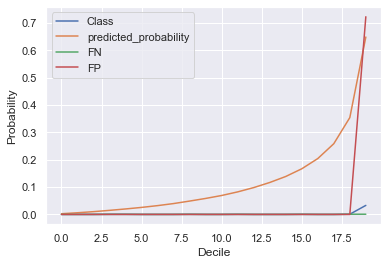

In [4]:
plot1 = data[['Class','predicted_probability', 'FN', 'FP', 'proba_decile']].groupby("proba_decile").mean().plot()
plot1.set_ylabel("Probability")
plot1.set_xlabel("Decile")

<AxesSubplot:xlabel='proba_decile'>

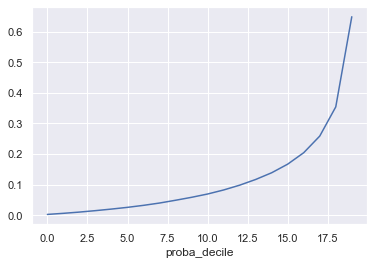

In [5]:
data[['predicted_probability', 'proba_decile']].groupby('proba_decile').mean().plot(legend=None)

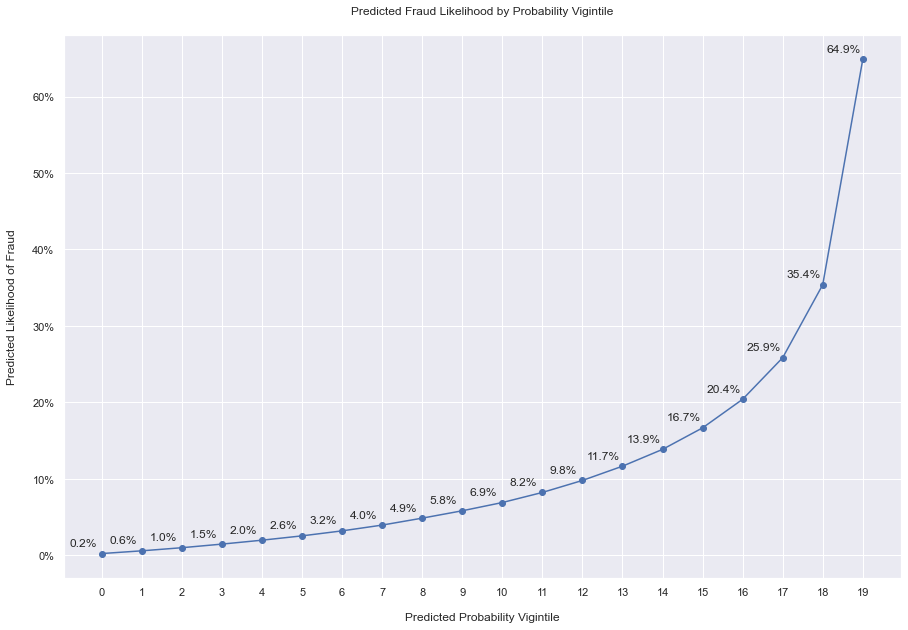

In [6]:
import matplotlib.ticker as ticker
plotdata = data[['predicted_probability', 'proba_decile']].groupby("proba_decile").mean().reset_index()
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(plotdata.proba_decile, plotdata.predicted_probability, marker = 'o')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_ylabel("Predicted Likelihood of Fraud", labelpad = 15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1.0, decimals = 0))
ax.set_xlabel("Predicted Probability Vigintile", labelpad = 15)
ax.set_title("Predicted Fraud Likelihood by Probability Vigintile", pad = 20)
for x,y in zip(plotdata.proba_decile, plotdata.predicted_probability):
    label = "{:.1f}%" .format(y*100)

    ax.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(-19,7), # distance from text to points (x,y)
                 ha='center') # horizon

<AxesSubplot:xlabel='proba_decile'>

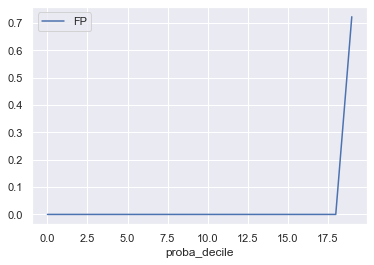

In [7]:
data[['FP', 'proba_decile']].groupby('proba_decile').mean().plot()

In [8]:
%matplotlib inline
from ipywidgets import interact
import seaborn as sns
plt.rcParams['agg.path.chunksize'] = 500

In [9]:
from IPython.display import Image

In [15]:
@interact(Variable = ['Actual % of Fraud', 'Actual Cases of Fraud', 'Predicted Likelihood', 'False Positives', 'False Negatives', 'XGB Performance'])
def plot(Variable):
    
    if Variable == 'Predicted Likelihood':
        plotdata = data[['predicted_probability', 'proba_decile']].groupby("proba_decile").mean().reset_index()
        fig, ax = plt.subplots(figsize=(15,10))
        sns.lineplot(plotdata.proba_decile, plotdata.predicted_probability, marker = 'o')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.set_ylabel("Predicted Likelihood of Fraud", labelpad = 15)
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1.0, decimals = 0))
        ax.set_xlabel("Predicted Probability Vigintile", labelpad = 15)
        ax.set_title("Predicted Fraud Likelihood by Probability Vigintile", pad = 20)
        for x,y in zip(plotdata.proba_decile, plotdata.predicted_probability):
            label = "{:.1f}%" .format(y*100)

            ax.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(-19,7), # distance from text to points (x,y)
                         ha='center') # horizon
    
    elif Variable == 'Actual % of Fraud':
        plotdata = data[['Class', 'proba_decile']].groupby("proba_decile").mean().reset_index()
        fig, ax = plt.subplots(figsize=(15,10))
        sns.lineplot(plotdata.proba_decile, plotdata.Class, marker = 'o')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.set_ylabel("Actual % of Fraud", labelpad = 15)
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1.0, decimals = 1))
        ax.set_xlabel("Predicted Probability Vigintile", labelpad = 15)
        ax.set_title("Actual % of Fraud by Probability Vigintile", pad = 20)
        for x,y in zip(plotdata.proba_decile, plotdata.Class):
            label = "{:.2f}%" .format(y*100)

            ax.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(-19,7), # distance from text to points (x,y)
                         ha='center') # horizon

    elif Variable == 'Actual Cases of Fraud':
        plotdata = data[['Class', 'proba_decile']].groupby("proba_decile").sum().reset_index()
        fig, ax = plt.subplots(figsize=(15,10))
        sns.lineplot(plotdata.proba_decile, plotdata.Class, marker = 'o')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.set_ylabel("Actual Cases of Fraud", labelpad = 15)
        ax.set_xlabel("Predicted Probability Vigintile", labelpad = 15)
        ax.set_title("Actual Cases of Fraud by Probability Vigintile", pad = 20)
        for x,y in zip(plotdata.proba_decile, plotdata.Class):
            label = "{:.0f}" .format(y)

            ax.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(-19,7), # distance from text to points (x,y)
                         ha='center') # horizon
            
    elif Variable == 'False Positives':
        plotdata = data[['FP', 'proba_decile']].groupby("proba_decile").sum().reset_index()
        fig, ax = plt.subplots(figsize=(15,10))
        sns.lineplot(plotdata.proba_decile, plotdata.FP, marker = 'o')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.set_ylabel("Number of False Positives", labelpad = 15)
        ax.set_xlabel("Predicted Probability Vigintile", labelpad = 15)
        ax.set_title("Number of False Positives by Probability Vigintile", pad = 20)
        for x,y in zip(plotdata.proba_decile, plotdata.FP):
            label = "{:.0f}" .format(y)

            ax.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(-19,7), # distance from text to points (x,y)
                         ha='center') # horizon
    elif Variable == 'False Negatives':
        plotdata = data[['FN', 'proba_decile']].groupby("proba_decile").sum().reset_index()
        fig, ax = plt.subplots(figsize=(15,10))
        sns.lineplot(plotdata.proba_decile, plotdata.FN, marker = 'o')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.set_ylabel("Number of False Negatives", labelpad = 15)
        ax.set_xlabel("Predicted Probability Vigintile", labelpad = 15)
        ax.set_title("Number of False Negatives by Probability Vigintile", pad = 20)
        for x,y in zip(plotdata.proba_decile, plotdata.FN):
            label = "{:.0f}" .format(y)

            ax.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(-19,7), # distance from text to points (x,y)
                         ha='center') # horizon
            
    elif Variable == 'XGB Performance':
        display(Image(filename='/Users/umangchaudhry/Documents/Vanderbilt/Grad School/Fall 2020/Case Studies in Data Science/Case Study 2/DSCaseStudy2-Credit-Fraud/data/XGB.png'))

interactive(children=(Dropdown(description='Variable', options=('Actual % of Fraud', 'Actual Cases of Fraud', …